# Exercise 3 - Pixelwise Opeations

First we will be working with an X-ray image of the human vertebra.png. This type of images can for example be used for diagnosis of osteoporosis. A symptom is the so-called vertebral compression fracture. However, the diagnosis is very difficult to do based on x-rays alone.

### Exercise 1 
Start by reading the image and inspect the histogram. Is it a bimodal histogram? Do you think it will be possible to segment it so only the bones are visible?

In [1]:
from skimage import io, color
from skimage.util import img_as_float, img_as_ubyte
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1

im_org = io.imread("data/vertebra.png")
io.imshow(im_org)
plt.title('Vertebra image')
io.show()


<Figure size 640x480 with 1 Axes>

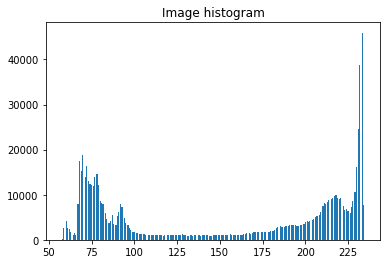

In [2]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

### Exercise2 
Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?

In [3]:
max_org = np.max(im_org)
min_org = np.min(im_org)
print("Max Value:",np.max(im_org))
print("Min Value:",np.min(im_org),'\n')
# the full scale of gray is not being used the min value is no 0 
# and the max is 255. 

Max Value: 235
Min Value: 57 



### Exericse 3 
Use img_as_float to compute a new float version of your input image. Compute the minimum and maximum values of this float image. Can you verify that the float image is equal to the original image, where each pixel value is divided by 255?

In [4]:
img_float = img_as_float(im_org.copy())
print("Original max values divided by 255:", max_org/255)
print("Max Value:",np.max(img_float))
print("Original min values divided by 255:", min_org/255)
print("Min Value:",np.min(img_float))

Original max values divided by 255: 0.9215686274509803
Max Value: 0.9215686274509803
Original min values divided by 255: 0.2235294117647059
Min Value: 0.22352941176470587


### Exercise 4 
Use img_as_ubyte on the float image you computed in the previous exercise. Compute the Compute the minimum and maximum values of this image. Are they as expected?

In [5]:
img_ubyte = img_as_ubyte(img_float)
print("Max Value:",np.max(img_ubyte))
print("Min Value:",np.min(img_ubyte))

Max Value: 235
Min Value: 57


C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


### Exercise 5 
Implement a Python function called histogram_stretch. It can, for example, follow this example:

In [6]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out = (((max_desired-min_desired)/(max_val-min_val))*(img_float-min_val))+min_desired

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)


### Exercise 6 
Test your histogram_stretch on the vertebra.png image. Show the image before and after the histogram stretching. What changes do you notice in the image? Are the important structures more visible?

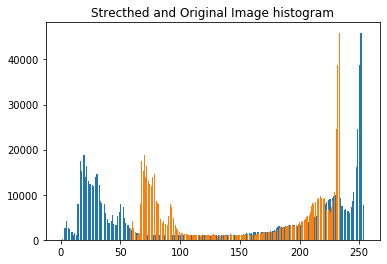

In [7]:
strectched_img = histogram_stretch(im_org.copy())
plt.hist(strectched_img.ravel(), bins=256, label='Stretched')
plt.hist(im_org.ravel(), bins=256, label='Original')
plt.title('Strecthed and Original Image histogram')
io.show()

### Exercise 7 
Implement a function, gamma_map(img, gamma), that:

1. Converts the input image to float
2. Do the gamma mapping on the pixel values
3. Returns the resulting image as an unsigned byte image.

In [8]:
def gamma_map(img, gamma):
    """
    performes gamma mapping of pixel values 
    :param img, gamme: Input image in unsigned byte, gamma value
    :return: Image in unsigned byte with gamma mapping applied. 
    """
    img_float = img_as_float(img)
    img_out = np.power(img_float,gamma)
    return img_as_ubyte(img_out)

### Exercise 8 
Test your gamma_map function on the vertebra image or another image of your choice. Try different values of , for example 0.5 and 2.0. Show the resuling image together with the input image. Can you see the differences in the images?

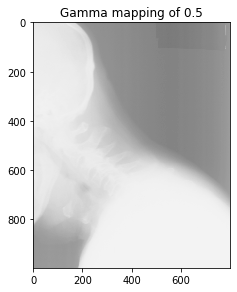

In [9]:
gamma_05 = im_org.copy()
gamma_05 = gamma_map(gamma_05, 0.5)
io.imshow(gamma_05)
plt.title('Gamma mapping of 0.5')
io.show()

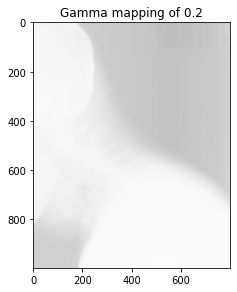

In [10]:
gamma_02 = im_org.copy()
gamma_02 = gamma_map(gamma_02, 0.2)
io.imshow(gamma_02)
plt.title('Gamma mapping of 0.2')
io.show()


### Exercise 9 
Implement a function, threshold_image :

In [11]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    for i in range(len(img_in[:,1])):
        for j in range(len(img_in[1,:])):
            if img_in[i,j] > thres:
                img_in[i,j] = 255
            else:
                img_in[i,j] = 0 
    
    return img_in

### Exercise 10 
Test your threshold_image function on the vertebra image with different thresholds. It is probably not possible to find a threshold that seperates the bones from the background, but can you find a threshold that seperates the human from the background?

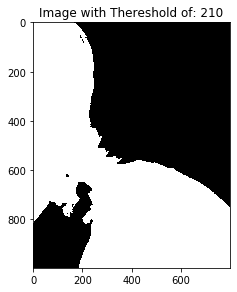

In [12]:
threshold_img = im_org.copy()
threshold_img = threshold_image(threshold_img, 180)
io.imshow(threshold_img)
plt.title('Image with Thereshold of: 210')
io.show()

### Execise 11
Read the documentation of Otsu's method and use it to compute and apply a threshold to the vertebra image.
How does the threshold and the result compare to your manually found threshold?

148
(998, 800)


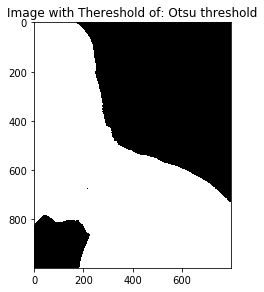

In [31]:
gray_scale_img = im_org.copy()
thresh = threshold_otsu(gray_scale_img)
print(thresh)
threshold_img_otsu = im_org.copy()
threshold_img_otsu = threshold_image(threshold_img_otsu, thresh)
#print(threshold_img_otsu.shape)
io.imshow(threshold_img_otsu)
plt.title('Image with Thereshold of: Otsu threshold')
io.show()

### Exercise 12 
Use your camera to take some pictures of yourself or a friend. Try to take a picture on a dark background. Convert the image to grayscale and try to find a threshold that creates a silhouette image (an image where the head is all white and the background black). Alternatively, you can use the supplied photo dark_background.png found in the exercise data.

(510, 776, 3)
(510, 776)


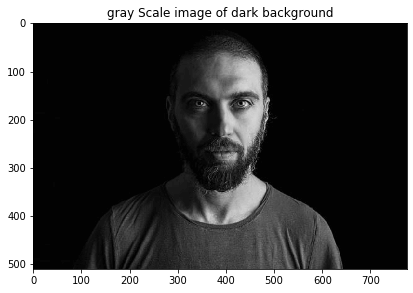

In [26]:
im_dark = io.imread("data/dark_background.png")
gray_scale = color.rgb2gray(im_dark.copy())
print(im_dark.shape)
print(gray_scale.shape)
io.imshow(gray_scale)
plt.title('gray Scale image of dark background')
io.show()

Max value of gray scale image 0.9512517647058822
Min value of gray scale image 0.0
Thereshold found from Otsu: 0.22480754595588232


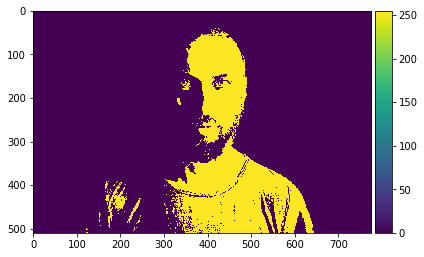

In [30]:
print("Max value of gray scale image",np.max(gray_scale))
print("Min value of gray scale image",np.min(gray_scale))

threshold_man = threshold_otsu(gray_scale)
print("Thereshold found from Otsu:", threshold_man)

threshold_man_img = threshold_image(gray_scale.copy(), threshold_man)
#print(threshold_man_img.shape)
#print(threshold_man_img[400,:])
io.imshow(threshold_man_img)
plt.title('')
io.show()

### Exercise 13
Create a function detect_dtu_signs that takes as input a color image and returns an image, where the blue sign is identified by foreground pixels.

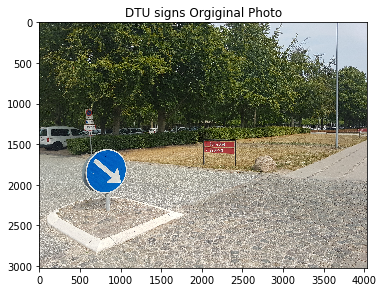

In [37]:
def detect_dtu_signs(in_img):
    """
    takes a coloured images as inputs 
    returns an image where the blue sign is identifies by foreground pixels. 
    """
    r_comp = in_img[:, :, 0]
    g_comp = in_img[:, :, 1]
    b_comp = in_img[:, :, 2]
    segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    return in_img

dtu_org = io.imread("data/DTUSigns2.jpg")
io.imshow(dtu_org)
plt.title('DTU signs Orgiginal Photo')
io.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


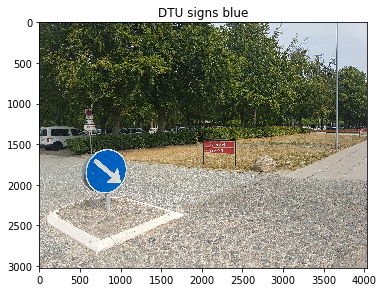

In [38]:
dtu_blue = detect_dtu_signs(dtu_org.copy())
io.imshow(dtu_blue)
plt.title('DTU signs blue')
io.show()

### Exercise 14 
Extend your detect_dtu_signs function so it can also detect red signs. You can add an argument to the function, that tells which color it should look for. You should use one of the explorative image tools to find out what the typical RGB values are in the red signs.

### Exercise 15 
Now make a sign segmentation function using tresholding in HSV space and locate both the blue and the red sign.

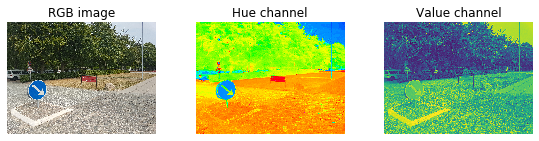

In [40]:
hsv_img = color.rgb2hsv(dtu_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(dtu_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
fig.tight_layout()
io.show()